In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
ds = pd.read_excel('fire_dataset_bin.xlsx', index_col=0)
ds = ds.drop(['lon', 'lat', 'Dist_str', 'Dist_railw', 'Dist_car'], axis=1) # удалим признаки описывающие только термоточку
print('Размер датасета: {}'.format(ds.shape))

Размер датасета: (8166, 16)


In [3]:
ds = ds.reset_index()
ds.head()

,index,area,T,Po,P,Pa,U,DD,Ff,N,WW,Cl,Nh,H,Cm,VV,Td
0,2017-09-24 10:00:00,0,9.4,761.9,774.8,0.1,71,"Ветер, дующий с востока",2,100%.,NaN,"Слоисто-кучевые, образовавшиеся не из кучевых.",50%.,600-1000,"Высококучевые просвечивающие, расположенные на...",10.0,4.3
1,2017-09-24 13:00:00,0,11.7,762.4,775.2,0.5,56,"Ветер, дующий с северо-северо-востока",3,70 – 80%.,NaN,"Слоисто-кучевые, образовавшиеся не из кучевых.",70 – 80%.,600-1000,"Высококучевых, высокослоистых или слоисто-дожд...",10.0,3.1
2,2017-09-24 16:00:00,0,11.6,762.7,775.6,0.3,53,"Ветер, дующий с северо-востока",2,70 – 80%.,NaN,"Слоисто-кучевые, образовавшиеся не из кучевых.",70 – 80%.,600-1000,"Высококучевых, высокослоистых или слоисто-дожд...",10.0,2.3
3,2017-09-24 19:00:00,0,7.7,763.3,776.4,0.6,64,"Ветер, дующий с северо-востока",2,70 – 80%.,NaN,"Кучево-дождевые лысые с кучевыми, слоисто-куче...",70 – 80%.,600-1000,"Высококучевых, высокослоистых или слоисто-дожд...",10.0,1.2
4,2017-09-24 22:00:00,0,6.1,763.6,773.7,0.3,77,"Ветер, дующий с севера",1,Облаков нет.,NaN,"Кучево-дождевые лысые с кучевыми, слоисто-куче...",70 – 80%.,600-1000,"Высококучевых, высокослоистых или слоисто-дожд...",10.0,2.3


In [18]:
ds.loc[49, 'T'] = -40
ds.loc[2756, 'T'] = 60

## Поиск аномалий в признаке

Аномалии в виде точек за усами графика (значения вне интерквартильного интервала) :

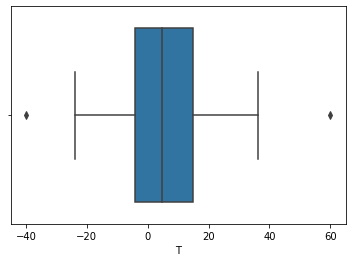

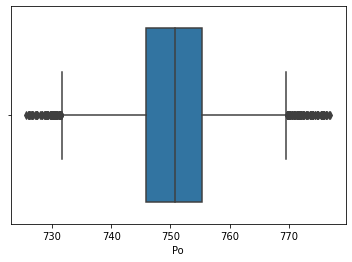

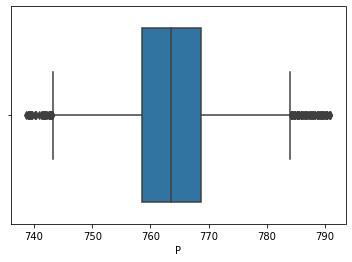

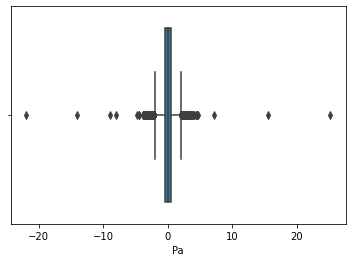

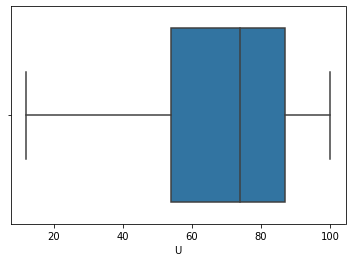

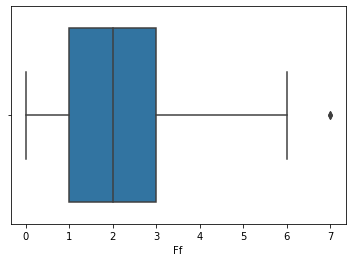

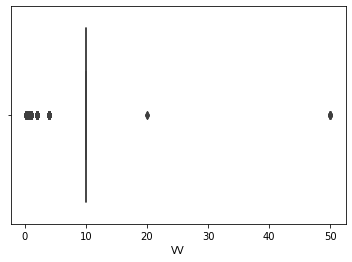

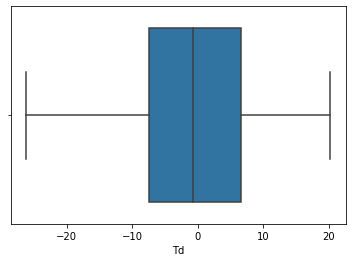

In [19]:
for col in ds.drop(['index', 'area'], axis=1).select_dtypes(exclude='O').columns:
    plt.figure()
    sns.boxplot(x=ds[col])

Выделение аномалий при расчете z-score:

In [20]:
def detect_outliers_zscore(data):
    outliers = []
    mean = np.mean(data) 
    std = np.std(data)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > 3):
            outliers.append(i)
    return outliers

sample_outliers = detect_outliers_zscore(ds['T'])
print("Выбросы при расчете Z-scores: ", sample_outliers)

Выбросы при расчете Z-scores:  [-40.0, 60.0]


## Работа с выбросами

In [21]:
ds_new = ds.copy()
idx_outlier = np.where(ds['T'].isin(sample_outliers))[0] 
#ds_new = ds_new.drop(idx_outlier) # удалить образец с выбросами
ds_new.loc[idx_outlier, 'T'] = ds_new['T'].median() # заполнение медианным значением

In [22]:
detect_outliers_zscore(ds_new['T'])

[]

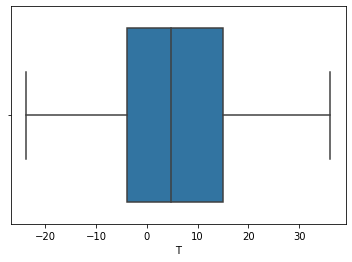

In [23]:
sns.boxplot(x=ds_new['T']);